In [5]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv(r"C:\Users\anjan\Downloads\myexcel - myexcel.csv.csv")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


### Preprocessing: Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis. (1 mark)

In [11]:
data["Height"]=np.random.randint(150,181,size=len(data))
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,151,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,166,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,174,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,154,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,173,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,158,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,152,231,Kansas,947276.0


In [13]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [15]:
data.isnull().mean()

Name        0.000000
Team        0.000000
Number      0.000000
Position    0.000000
Age         0.000000
Height      0.000000
Weight      0.000000
College     0.183406
Salary      0.024017
dtype: float64

In [17]:
missing_salary_players = data[data['Salary'].isnull()]
missing_salary_players

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27,151,205,Boston University,NaN
46,Elton Brand,Philadelphia 76ers,42,PF,37,177,254,Duke,NaN
171,Dahntay Jones,Cleveland Cavaliers,30,SG,35,158,225,Duke,NaN
264,Jordan Farmar,Memphis Grizzlies,4,PG,29,153,180,UCLA,NaN
269,Ray McCallum,Memphis Grizzlies,5,PG,24,156,190,Detroit,NaN
270,Xavier Munford,Memphis Grizzlies,14,PG,24,166,180,Rhode Island,NaN
273,Alex Stepheson,Memphis Grizzlies,35,PF,28,156,270,USC,NaN
350,Briante Weber,Miami Heat,12,PG,23,159,165,Virginia Commonwealth,NaN
353,Dorell Wright,Miami Heat,11,SF,30,173,205,NaN,NaN
397,Axel Toupane,Denver Nuggets,6,SG,23,157,210,NaN,NaN


#### Replacing missing values in Salary column using team wise median.

In [19]:
median_salary_by_team=data.groupby("Team")["Salary"].median()
median_salary_by_team

Team
Atlanta Hawks             2854940.0
Boston Celtics            3021242.5
Brooklyn Nets             1335480.0
Charlotte Hornets         4204200.0
Chicago Bulls             2380440.0
Cleveland Cavaliers       4975000.0
Dallas Mavericks          3950313.0
Denver Nuggets            2907000.0
Detroit Pistons           2891760.0
Golden State Warriors     3815000.0
Houston Rockets           2288205.0
Indiana Pacers            4000000.0
Los Angeles Clippers      3110796.0
Los Angeles Lakers        1724250.0
Memphis Grizzlies         4544009.5
Miami Heat                2481720.0
Milwaukee Bucks           2254167.0
Minnesota Timberwolves    2148360.0
New Orleans Pelicans      2850000.0
New York Knicks           2225421.0
Oklahoma City Thunder     3344000.0
Orlando Magic             3956580.0
Philadelphia 76ers        1037084.5
Phoenix Suns              2041080.0
Portland Trail Blazers    2854940.0
Sacramento Kings          3156600.0
San Antonio Spurs         2814000.0
Toronto Raptors        

In [21]:
data["Salary"] = data.apply(
    lambda row: median_salary_by_team[row['Team']] if pd.isnull(row["Salary"]) else row["Salary"],
    axis=1)

In [23]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary       0
dtype: int64

### 1.Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)¶

In [25]:
team_distribution=data["Team"].value_counts().reset_index()
team_distribution

,Team,count
0,New Orleans Pelicans,19
1,Memphis Grizzlies,18
2,Utah Jazz,16
3,New York Knicks,16
4,Milwaukee Bucks,16
5,Brooklyn Nets,15
6,Portland Trail Blazers,15
7,Oklahoma City Thunder,15
8,Denver Nuggets,15
9,Washington Wizards,15


In [27]:
team_distribution.columns = ["Team", "Employee_Count"]
team_distribution["Percentage"] = (team_distribution["Employee_Count"] / len(data)) * 100
team_distribution

,Team,Employee_Count,Percentage
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,New York Knicks,16,3.493450
4,Milwaukee Bucks,16,3.493450
5,Brooklyn Nets,15,3.275109
6,Portland Trail Blazers,15,3.275109
7,Oklahoma City Thunder,15,3.275109
8,Denver Nuggets,15,3.275109
9,Washington Wizards,15,3.275109


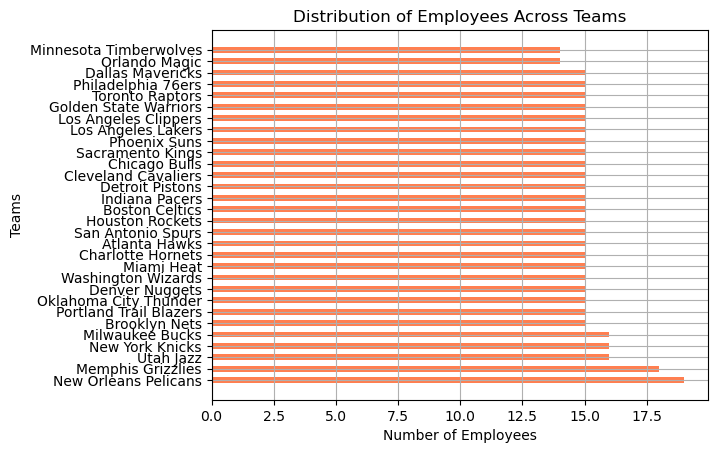

In [29]:
import matplotlib.pyplot as plt
plt.barh(team_distribution["Team"],team_distribution["Employee_Count"],height=0.5,color="coral")
plt.xlabel("Number of Employees")
plt.ylabel("Teams")
plt.title("Distribution of Employees Across Teams")
plt.grid()
plt.show()

#### Findings: 
               1. New Orleans Pelicans has most employee numbers(19 employees, 4.148%)
               2. Minnesota Timberwolves and Orlando Magic has the least employee numbers(14 each, and 3.05%)
               3. Most of the teams contains 15 employees.

### 2. Segregate employees based on their positions within the company. (2 marks)¶

In [31]:
position_distribution=data["Position"].value_counts().reset_index()
position_distribution.columns = ["Position", "Employee_Count"]
position_distribution

,Position,Employee_Count
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


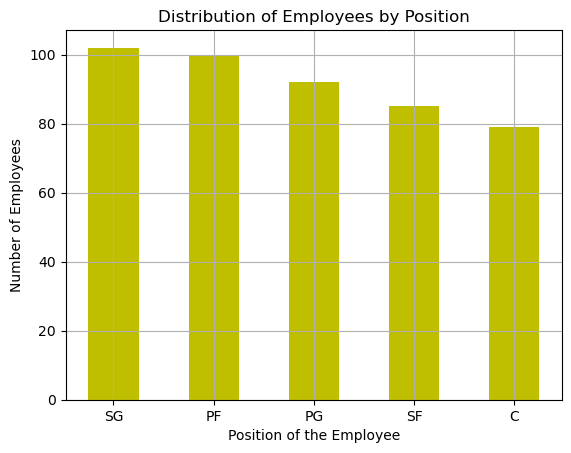

In [43]:
plt.bar(position_distribution["Position"],position_distribution["Employee_Count"],width=0.5,color="y")
plt.title("Distribution of Employees by Position")
plt.xlabel("Position of the Employee")
plt.ylabel("Number of Employees")
plt.grid()
plt.show()

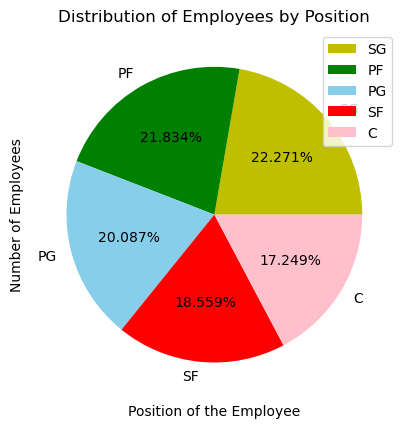

In [37]:
plt.pie(position_distribution["Employee_Count"],labels=position_distribution["Position"],colors=["y","g","skyblue","r","pink"],autopct="%1.3f%%")
plt.title("Distribution of Employees by Position")
plt.xlabel("Position of the Employee")
plt.ylabel("Number of Employees")
plt.legend(position_distribution["Position"],loc="best")
plt.show()

#### Findings:
            1.Most number of employees respresent the position "SG"(102 employees,22.27%)
            2.Least number of employees represent the position "C" (79 employees,17.25%)

### 3. Identify the predominant age group among employees. (2 marks)


In [40]:
Age_distribution=data["Age"].value_counts().reset_index()
Age_distribution

,Age,count
0,24,47
1,25,46
2,27,41
3,23,41
4,26,36
5,28,31
6,30,31
7,29,28
8,22,26
9,31,22


In [53]:
data["Age"].min(), data["Age"].max()

(19, 40)

In [42]:
age_bins=[18,25,30,35,40,45]
age_labels=["18-24","25-29", "30-34", "35-39", "40-45"]
data["Age_group"]=pd.cut(data["Age"], bins=age_bins,labels=age_labels,right=False)
Age_group_distribution=data["Age_group"].value_counts().reset_index()
Age_group_distribution.columns = ["Age_Group", "Employee_Count"]
Age_group_distribution 

,Age_Group,Employee_Count
0,25-29,182
1,18-24,154
2,30-34,90
3,35-39,29
4,40-45,3


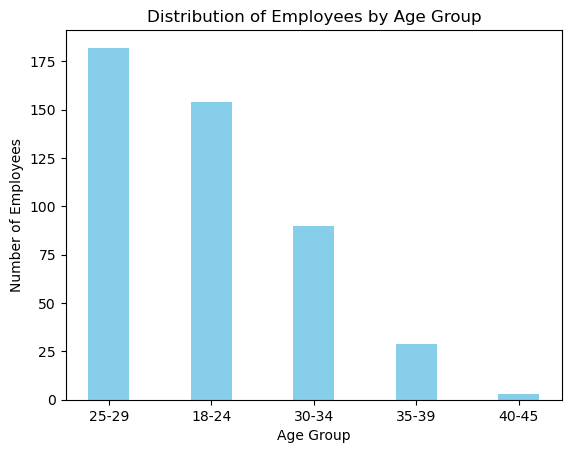

In [57]:
plt.bar(Age_group_distribution["Age_Group"], Age_group_distribution["Employee_Count"],width=0.4,color="skyblue")
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Age Group')
plt.show()

#### Findings:
            1.Most number of employees belongs to the age group "25-29".(182 employees).
            2.Age between "40-45" contains least number of employees.
            3.Age between "18-24" contains 154 employees which is second largest age group.

### 4. Discover which team and position have the highest salary expenditure. (2 marks)

In [48]:
salary_expendicture=data.groupby(["Team","Position"])["Salary"].sum().reset_index()
salary_expendicture

,Team,Position,Salary
0,Atlanta Hawks,C,22756250.0
1,Atlanta Hawks,PF,23952268.0
2,Atlanta Hawks,PG,9763400.0
3,Atlanta Hawks,SF,6000000.0
4,Atlanta Hawks,SG,10431032.0
...,...,...,...
144,Washington Wizards,C,24490429.0
145,Washington Wizards,PF,11300000.0
146,Washington Wizards,PG,18022415.0
147,Washington Wizards,SF,11158800.0


In [50]:
highest_salary_team=salary_expendicture.sort_values(by="Salary",ascending=False).head(1)
highest_salary_team

,Team,Position,Salary
67,Los Angeles Lakers,SF,31866445.0


In [52]:
top_ten_highest_salary_teams=salary_expendicture.sort_values(by="Salary",ascending=False).head(10)
top_ten_highest_salary_teams

,Team,Position,Salary
67,Los Angeles Lakers,SF,31866445.0
75,Miami Heat,PF,31538671.0
53,Houston Rockets,SG,28122883.0
116,Phoenix Suns,PG,28002998.0
37,Denver Nuggets,SF,27982771.0
25,Cleveland Cavaliers,PF,27882029.0
93,New Orleans Pelicans,SG,27489643.0
124,Sacramento Kings,C,26950230.0
70,Memphis Grizzlies,PF,26722463.5
102,Oklahoma City Thunder,SF,25798862.0


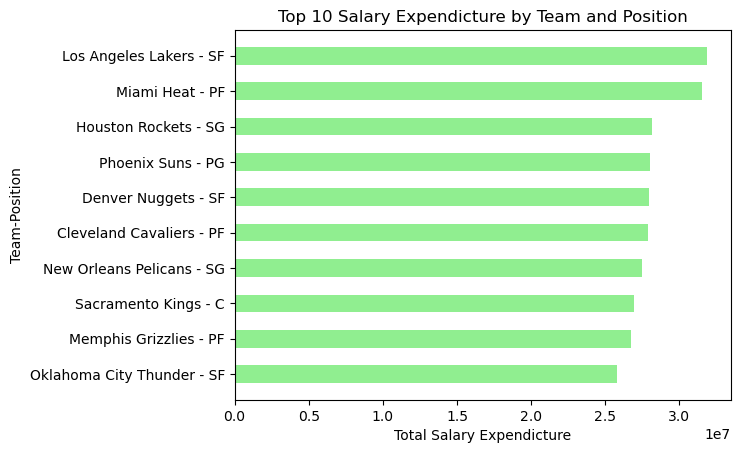

In [54]:
plt.barh(top_ten_highest_salary_teams.apply(lambda x: f"{x['Team']} - {x['Position']}", axis=1),top_ten_highest_salary_teams["Salary"],height=0.5,color="lightgreen")
plt.xlabel("Total Salary Expendicture")
plt.ylabel("Team-Position")
plt.title("Top 10 Salary Expendicture by Team and Position")
plt.gca().invert_yaxis()
plt.show()

#### Findings:
            1."Los Angeles Lakers" is the team with highest salary expendicture.	
            2."SF" is the position with highest salary.
            3. The  highest salary is 31866445.0
            4. The graph represents Team and Position with top 10 salary expendicture.

### 5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

In [56]:
data_age_salary = data[['Age', 'Salary']]
correlation = data_age_salary['Age'].corr(data_age_salary['Salary'])

print("correlation between Age and Salary is:",correlation)
data_age_salary

correlation between Age and Salary is: 0.20875264951255926


,Age,Salary
0,25,7730337.0
1,25,6796117.0
2,27,3021242.5
3,22,1148640.0
4,29,5000000.0
...,...,...
453,26,2433333.0
454,24,900000.0
455,26,2900000.0
456,26,947276.0


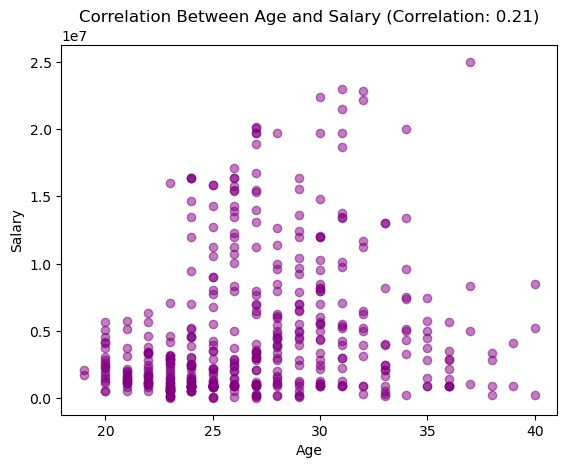

correlation between Age and Salary is: 0.20875264951255926


In [83]:
plt.scatter(data_age_salary['Age'], data_age_salary['Salary'], alpha=0.5, color='purple')
plt.title(f'Correlation Between Age and Salary (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

print("correlation between Age and Salary is:",correlation)

#### Findings:
            1. The correlation Coefficient between Age and Salary is 0.208
            2. It is a positive Correlation. Since correlation Coefficien is less than 0.3; it is a weak correlation.
            3. There is a slight increase in the salary when the age increases but it is not consistant.

### Data Story: Key Findings from Analysis
      1.Employee Distribution Across Teams:
              * New Orleans Pelicans has most employee numbers(19 employees, 4.148%)
              * Minnesota Timberwolves and Orlando Magic has the least employee numbers(14 each, and 3.05%)
              * Most of the teams contains 15 employees.
              
      2.Employee Segregation based on their position:
               * Most number of employees respresent the position "SG" (102 employees).         
      * .Least number of employees represent the position "C (79 employees).

      3.Distribution of Employees by Age Group:
               * Most number of employees belongs to the age group "25-29".(182 employees).        
      * .Age between "40-45" contains least number of employee(3 employees).
             * 3.Age between "18-24" contains 154 employees which is second largest age group."
            * Based on First and Second position, majority of the total work force are youngsters.

      4.Salary Expenditure by Team and Position:
                *'The Los Angeles Lakers' is the team and 'SF' is the position with a  salary expenditure of 31,866,445.

      5.Correlation Between Age and Salary:
               * There is a weak positive correlation (0.208) between Age and Salary.
               * A slight increase in salary is visible when the age increases but it is not consistant.

1.The weak correlation between age and salary indicates that factors other than age play a significant role in determining salary levels.

2.The organization ia mainly focusing on Young talents.   